

# Project: Investigate a Dataset (No Show Appointments Data Set
This dataset collects information from 100k medical appointments in Brazil )

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


No Show Appointments Data Set
This dataset collects information from 100k medical appointments in Brazil 

my Question :
### Research Question 1 what's the most high diseases by  each gender ?

### Research Question 2  which neighborhoods they have highest diseases ?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
noshow_appoint_df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
noshow_appoint_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No




### Data Cleaning (i do change some disases and check if i found null value or not )

In [3]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
noshow_appoint_df=noshow_appoint_df.rename(columns = {'Hipertension':'Hypertension','Handcap':'Handicap'})
noshow_appoint_df.head()
noshow_appoint_df.describe()
noshow_appoint_df.info()
noshow_appoint_df.isnull().any()
len (noshow_appoint_df[noshow_appoint_df.duplicated()==True])



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handicap          110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


0

i changed the name disases (  Hipertension to Hypertension and Handcap to Handicap

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 what's the most high diseases by  each gender ?

visualisation Gender 

In [9]:
CDF=noshow_appoint_df.groupby('Diabetes').sum
CDF.head()

AttributeError: 'function' object has no attribute 'head'

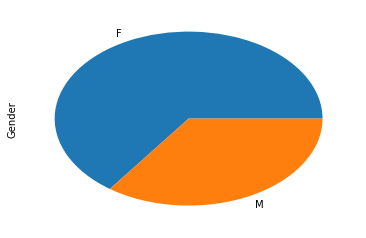

In [4]:
noshow_appoint_df['Gender'].value_counts().plot(kind='pie')

in this pie chart we see  number of Female greater than male 

### Diseases by Gender

In [5]:
# Diseases
hypertension = noshow_appoint_df[noshow_appoint_df['Hypertension']==1] 
diabetes = noshow_appoint_df[noshow_appoint_df['Diabetes'] ==1]
alcoholism = noshow_appoint_df[noshow_appoint_df['Alcoholism'] ==1]
handicap = noshow_appoint_df[noshow_appoint_df['Handicap'] == 1]

In [6]:
all_diseases= len(hypertension)+len(diabetes)+len(alcoholism)+len(handicap)
print("percentage of hypertension: ",round((len(hypertension)/all_diseases)*100 ,2))
print("percentage of diabetes: ",round((len(diabetes)/all_diseases)*100 ,2))
print("percentage of alcoholism: ",round((len(alcoholism)/all_diseases)*100 ,2))
print("percentage of handicap: ",round((len(handicap)/all_diseases)*100 ,2))

percentage of hypertension:  62.03
percentage of diabetes:  22.6
percentage of alcoholism:  9.56
percentage of handicap:  5.81


In [7]:
counts_hypertension = hypertension.groupby(['Gender']).size()
counts_diabetes = diabetes.groupby(['Gender']).size()
counts_alcoholism = alcoholism.groupby(['Gender']).size()
counts_handicap = handicap.groupby(['Gender']).size()

Text(0.5,1,'Diseases by Gender')

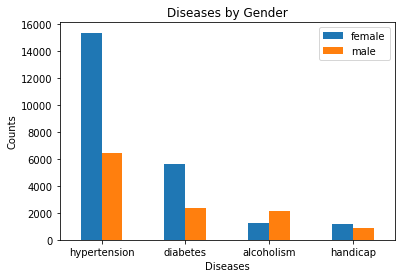

In [8]:
female= [counts_hypertension.F, counts_diabetes.F, counts_alcoholism.F, counts_handicap.F]
male = [counts_hypertension.M, counts_diabetes.M, counts_alcoholism.M, counts_handicap.M]

index = ['hypertension', 'diabetes', 'alcoholism', 'handicap']

new_df = pd.DataFrame({'female': female, 'male': male}, index=index)
ax = new_df.plot.bar(rot=0)

plt.xlabel("Diseases")
plt.ylabel("Counts")
plt.title("Diseases by Gender")

in this bar chart we see Female and Male they have the same hightest diasese it's Hypertension 

### Research Question 2  which neighborhoods they have highest diseases ?

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


Diseases by Neighbourhood

In [9]:
neighbourhood = noshow_appoint_df.groupby(['Neighbourhood']).size()
neighbourhood.nlargest(3)

Neighbourhood
JARDIM CAMBURI    7717
MARIA ORTIZ       5805
RESISTÊNCIA       4431
dtype: int64

In [10]:
def neighbourhood_diseases(name_of_neighbourhood):
    neighbourhood_hypertension= len(hypertension.query('Neighbourhood==@name_of_neighbourhood'))
    neighbourhood_diabetes= len(diabetes.query('Neighbourhood==@name_of_neighbourhood'))
    neighbourhood_alcoholism= len(alcoholism.query('Neighbourhood==@name_of_neighbourhood'))
    neighbourhood_handicap= len(handicap.query('Neighbourhood==@name_of_neighbourhood'))
    
    return neighbourhood_hypertension, neighbourhood_diabetes, neighbourhood_alcoholism, neighbourhood_handicap

Text(0.5,1,'Diseases by Neighbourhood')

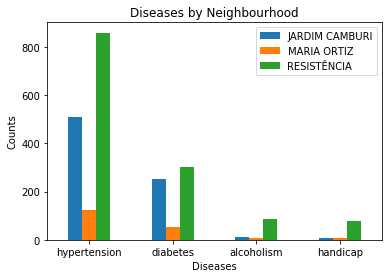

In [11]:
JARDIM_CAMBURI = list(neighbourhood_diseases('JARDIM CAMBURI'))
MARIA_ORTIZ = list(neighbourhood_diseases('MARIA ORTIZ'))
RESISTÊNCIA = list(neighbourhood_diseases('RESISTÊNCIA'))

neighbour_df = pd.DataFrame({'JARDIM CAMBURI': JARDIM_CAMBURI, 'MARIA ORTIZ': MARIA_ORTIZ, 'RESISTÊNCIA': RESISTÊNCIA}, index=index)
ax = neighbour_df.plot.bar(rot=0)

plt.xlabel("Diseases")
plt.ylabel("Counts")
plt.title("Diseases by Neighbourhood")

in this bar chart we see the Resistencia they have the highest diseases it's Hypertension 

Show up and Show Up

In [12]:
show_up = noshow_appoint_df[noshow_appoint_df['No-show']=='No'] 
no_show_up = noshow_appoint_df[noshow_appoint_df['No-show'] =='Yes']

In [13]:
print('Number of show_up: ', len(show_up))
print('Number of no_show_up: ', len(no_show_up))

Number of show_up:  88208
Number of no_show_up:  22319


In [14]:
hypertension_showup = show_up.query('Hypertension=="1"')
hypertension_noshow = no_show_up.query('Hypertension=="1"')

diabetes_showup = show_up.query('Diabetes=="1"')
diabetes_noshow = no_show_up.query('Diabetes=="1"')

alcoholism_showup = show_up.query('Alcoholism=="1"')
alcoholism_noshow = no_show_up.query('Alcoholism=="1"')

handicap_showup = show_up.query('Handicap=="1"')
handicap_noshow = no_show_up.query('Handicap=="1"')

Text(0.5,1,'ShowUp and No_ShowUp')

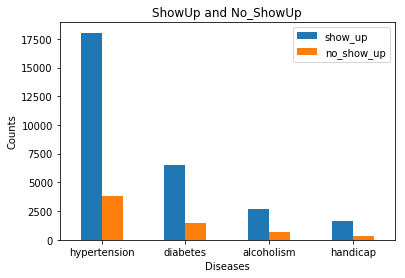

In [15]:
show_up= [len(hypertension_showup), len(diabetes_showup), len(alcoholism_showup), len(handicap_showup)]
no_show_up = [len(hypertension_noshow), len(diabetes_noshow), len(alcoholism_noshow), len(handicap_noshow)]

show_noshow_df = pd.DataFrame({'show_up': show_up, 'no_show_up': no_show_up}, index=index)
ax = show_noshow_df.plot.bar(rot=0)

plt.xlabel("Diseases")
plt.ylabel("Counts")
plt.title("ShowUp and No_ShowUp")

in this bar chart we see the disases of Hypertension is highest in show_up and also no_show_up 

<a id='conclusions'></a>
## Conclusions

As we know by looking a plots the highest  diseases in male and Female  was hypertension 


The highest diseases in Neighbourhoods  was  hypertension

The totall number show up and no show up the highest  in  diseases hypertension

<a id='limitations'></a>
 




<a id='conclusions'></a>
## limitations

should be the patient tells us the reason why him skip his appointment to get analysis specified and solve the problem 



we should be chosen for equal sample for Gender 


In [17]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255